In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit

In [9]:
#Definimos algunos parámetros
h=0.01
n=110000 #Longitud del vector tiempo
M=[1988470.0, 0.33, 4.87, 5.97, 0.642, 1899.0, 568.0, 86.8, 102.0]  #10^24 Kg


#Condiciones iniciales
CIr=[0.0, 69.818, 108.941, 152.100, 249.261, 816.363, 1506.527, 3001.390, 4558.857]  #x10^6 Km  afelio
CIv=[0.0, 38.86, 34.78, 29.29, 21.97, 12.44, 9.14, 6.49, 5.37] #Km/s

#Creamos los arrays que necesitamos
# 8 matrices diferentes para cada planeta, con 2 columnas para x e y, y de longitud l
tiempo=np.zeros(n)
r=np.zeros((9,2,n)) 
v=np.zeros((9,2,n))
a=np.zeros((9,2,n))


#Introducimos los valores de las condiciones iniciales
for i in range(9):
    r[i][0][0]=CIr[i]*10**6  
    v[i][1][0]=CIv[i]
    M[i]=M[i]*10**24




print("************************************************************************")
print("VECTOR DE LAS MASAS")
print("************************************************************************")
print()
print(M)
print()
print("************************************************************************")
print("MATRIZ DE POSICIONES INICIALES")
print("************************************************************************")
print()
print(r)
print()
print("************************************************************************")
print("MATRIZ DE VELOCIDADES INICIALES")
print("************************************************************************")
print()
print(v)
print()

************************************************************************
VECTOR DE LAS MASAS
************************************************************************

[1.98847e+30, 3.3e+23, 4.87e+24, 5.969999999999999e+24, 6.42e+23, 1.899e+27, 5.68e+26, 8.68e+25, 1.0199999999999999e+26]

************************************************************************
MATRIZ DE POSICIONES INICIALES
************************************************************************

[[[0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
   0.000000e+00]
  [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
   0.000000e+00]]

 [[6.981800e+07 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
   0.000000e+00]
  [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
   0.000000e+00]]

 [[1.089410e+08 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
   0.000000e+00]
  [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
   0.000000e

In [10]:
#Reescalamos
c=1.496*10**8  #Km
Ms=1.99*10**30  #Kg
G=6.67384*10**(-20) #Km^3 / Kg s^2

for i in range(9):
    r[i][0][0]=r[i][0][0]/c
    v[i][1][0]=v[i][1][0]*(c/(G*Ms))**0.5
    M[i]=M[i]/Ms


print("************************************************************************")
print("VECTOR DE LAS MASAS")
print("************************************************************************")
print()
print(M)
print()
print("************************************************************************")
print("MATRIZ DE POSICIONES INICIALES")
print("************************************************************************")
print()
print(r)
print()
print("************************************************************************")
print("MATRIZ DE VELOCIDADES INICIALES")
print("************************************************************************")
print()
print(v)
print()

************************************************************************
VECTOR DE LAS MASAS
************************************************************************

[0.9992311557788944, 1.6582914572864322e-07, 2.4472361809045223e-06, 2.9999999999999997e-06, 3.2261306532663317e-07, 0.0009542713567839196, 0.00028542713567839196, 4.3618090452261303e-05, 5.125628140703517e-05]

************************************************************************
MATRIZ DE POSICIONES INICIALES
************************************************************************

[[[ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]

 [[ 0.46669786  0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]

 [[ 0.72821524  0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0

In [11]:
#Función que calcula la aceleración resultante de la fuerza gravitatoria que ejerce un cuerpo A sobre otro B
def aceleracion(Masa, DistanciaA1, DistanciaB1, DistanciaA2, DistanciaB2):
        return(-Masa*(DistanciaA1-DistanciaB1))/((DistanciaA1-DistanciaB1)**2+(DistanciaA2-DistanciaB2)**2)**(3/2)

In [12]:
#Calculamos la aceleración inicial para cada planeta con la suma de fuerzas
for i in range(9):
        sumx=0.0
        sumy=0.0
        for j in range(9):
            if i!=j:
                sumx=sumx+aceleracion(M[j], r[i][0][0], r[j][0][0], r[i][1][0], r[j][1][0])
                sumy=sumy+aceleracion(M[j], r[i][1][0], r[j][1][0], r[i][0][0], r[j][0][0])      
        a[i][0][0]=sumx
        a[i][1][0]=sumy

print("************************************************************************")
print("MATRIZ DE ACELERACIONES INICIALES")
print("************************************************************************")
print()
print(a)

************************************************************************
MATRIZ DE ACELERACIONES INICIALES
************************************************************************

[[[ 4.34182784e-05  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 [[-4.58760547e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 [[-1.88420423e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 ...

 [[-9.89750241e-03  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.

In [13]:
#Empezamos el algoritmo
for k in range(n-1):
    #Evaluar r(t+h) y w(t)
    for i in range(9):
        r[i][0][k+1]=r[i][0][k]+h*v[i][0][k]+(a[i][0][k]*h**2)/2
        r[i][1][k+1]=r[i][1][k]+h*v[i][1][k]+(a[i][1][k]*h**2)/2

    #Evaluar a(t+h) para r(t+h)
    for i in range(9):
        sumx=0.0
        sumy=0.0
        for j in range(9):
            if i!=j:
                sumx=sumx+aceleracion(M[j], r[i][0][k+1], r[j][0][k+1], r[i][1][k+1], r[j][1][k+1])
                sumy=sumy+aceleracion(M[j], r[i][1][k+1], r[j][1][k+1], r[i][0][k+1], r[j][0][k+1])      
        a[i][0][k+1]=sumx
        a[i][1][k+1]=sumy
       
    
    #Evaluar v(t+h) 
    for i in range(9):
        v[i][0][k+1]=v[i][0][k]+(h/2)*(a[i][0][k]+a[i][0][k+1])
        v[i][1][k+1]=v[i][1][k]+(h/2)*(a[i][1][k]+a[i][1][k+1])

    
    #t=t+h
    tiempo[k+1]=tiempo[k]+h


print("************************************************************************")
print("MATRIZ DEL TIEMPO")
print("************************************************************************")
print()
print(tiempo)
print()
print("************************************************************************")
print("MATRIZ DE POSICIONES")
print("************************************************************************")
print()
print(r)
print()
print("************************************************************************")
print("MATRIZ DE VELOCIDADES")
print("************************************************************************")
print()
print(v)
print()
print("************************************************************************")
print("MATRIZ DE ACELERACIONES")
print("************************************************************************")
print()
print(a)
print()

************************************************************************
MATRIZ DEL TIEMPO
************************************************************************

[0.00000e+00 1.00000e-02 2.00000e-02 ... 1.09997e+03 1.09998e+03
 1.09999e+03]

************************************************************************
MATRIZ DE POSICIONES
************************************************************************

[[[ 0.00000000e+00  2.17091392e-09  8.68356878e-09 ...  4.81361086e-03
    4.80929114e-03  4.80497218e-03]
  [ 0.00000000e+00  0.00000000e+00  1.49222891e-11 ...  5.66414663e-01
    5.66418275e-01  5.66421883e-01]]

 [[ 4.66697861e-01  4.66468481e-01  4.65780427e-01 ...  1.01025826e-01
    8.26427256e-02  6.40051491e-02]
  [ 0.00000000e+00  1.30422992e-02  2.60717738e-02 ...  8.62523547e-01
    8.69227226e-01  8.74940867e-01]]

 [[ 7.28215241e-01  7.28121030e-01  7.27838424e-01 ... -6.80683208e-01
   -6.77076144e-01 -6.73285531e-01]
  [ 0.00000000e+00  1.16729585e-02  2.33428965e-

In [14]:
sol=r[0,:,0:10]
mercurio=r[1,:,0:1000]
venus=r[2,:,0:1000]
tierra=r[3,:,0:1000]
marte=r[4,:,0:2000]
jupiter=r[5,:,0:50000]
saturno=r[6,:,:]
urano=r[7,:,:]
neptuno=r[8,:,:]

print("************************************************************************")
print("SOL")
print("************************************************************************")
print()
print(sol)
print()
print("************************************************************************")
print("MERCURIO")
print("************************************************************************")
print()
print(mercurio)
print()
print("************************************************************************")
print("VENUS")
print("************************************************************************")
print()
print(venus)
print()
print("************************************************************************")
print("TIERRA")
print("************************************************************************")
print()
print(tierra)
print()
print("************************************************************************")
print("JÚPITER")
print("************************************************************************")
print()
print(jupiter)
print()
print("************************************************************************")
print("SATURNO")
print("************************************************************************")
print()
print(saturno)
print("************************************************************************")
print("URANO")
print("************************************************************************")
print()
print(urano)
print()
print("************************************************************************")
print("NEPTUNO")
print("************************************************************************")
print()
print(neptuno)

************************************************************************
SOL
************************************************************************

[[0.00000000e+00 2.17091392e-09 8.68356878e-09 1.95377038e-08
  3.47328843e-08 5.42685010e-08 7.81437700e-08 1.06357732e-07
  1.38909252e-07 1.75797017e-07]
 [0.00000000e+00 0.00000000e+00 1.49222891e-11 5.96889063e-11
  1.49221390e-10 2.98440524e-10 5.22266082e-10 8.35616570e-10
  1.25340895e-09 1.79055839e-09]]

************************************************************************
MERCURIO
************************************************************************

[[ 0.46669786  0.46646848  0.46578043 ... -0.22914036 -0.21733571
  -0.2049056 ]
 [ 0.          0.0130423   0.02607177 ... -0.22774242 -0.24244278
  -0.25644941]]

************************************************************************
VENUS
************************************************************************

[[ 0.72821524  0.72812103  0.72783842 ... -0.62782866 -0.622

Text(0, 0.5, 'AU')

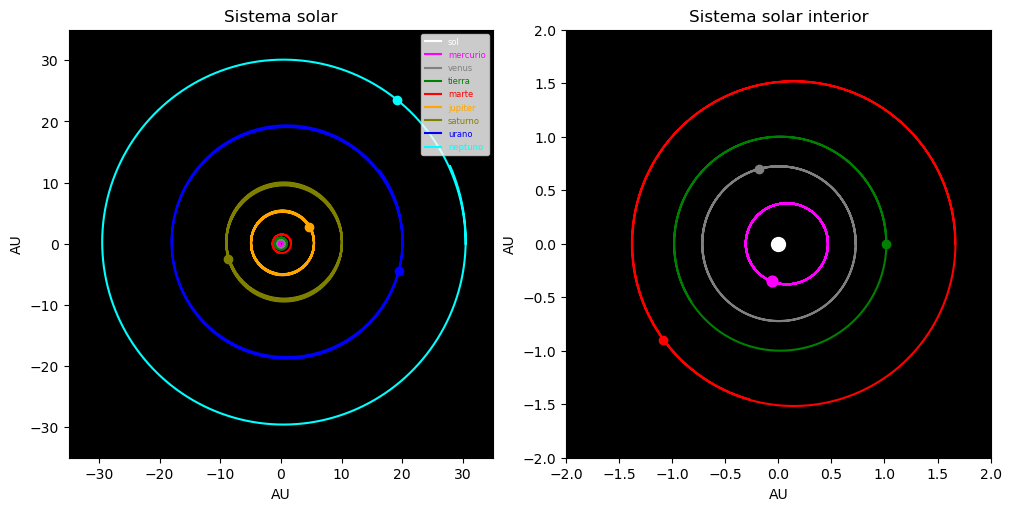

In [15]:
fig, axs=plt.subplots(ncols=2,nrows=1 , figsize=(10,5), layout="constrained") 
gs = GridSpec(1, 2, figure=fig, width_ratios=[3, 1])

axs[0].set_facecolor('black')
axs[1].set_facecolor('black')
axs[0].axis([-35, 35,-35,35])
axs[0].plot(sol[0], sol[1], 'white', label='sol') 
axs[0].plot(mercurio[0], mercurio[1], 'magenta', label='mercurio') 
axs[0].plot(venus[0], venus[1], 'grey', label='venus') 
axs[0].plot(tierra[0], tierra[1], 'green', label='tierra') 
axs[0].plot(marte[0], marte[1], 'red', label='marte') 
axs[0].plot(jupiter[0], jupiter[1], 'orange', label='jupiter') 
axs[0].plot(saturno[0], saturno[1], 'olive', label='saturno') 
axs[0].plot(urano[0], urano[1], 'blue', label='urano')
axs[0].plot(neptuno[0], neptuno[1], 'cyan', label='neptuno') 


axs[0].scatter(r[5][0][700], r[5][1][700],  color='orange') 
axs[0].scatter(r[6][0][10000], r[6][1][10000],  color='olive') 
axs[0].scatter(r[7][0][50000], r[7][1][50000],  color='blue')
axs[0].scatter(r[8][0][15000], r[8][1][15000],  color='cyan') 


axs[0].set_xlabel('AU')     
axs[0].set_ylabel('AU')       
axs[0].legend(loc = 'upper right', labelcolor='linecolor', fontsize = 6)
axs[0].set_title(r'Sistema solar')


axs[1].set_title(r'Sistema solar interior')
axs[1].axis([-2, 2,-2,2])
axs[1].plot(sol[0], sol[1], 'white', label='sol') 
axs[1].plot(mercurio[0], mercurio[1], 'magenta', label='mercurio') 
axs[1].plot(venus[0], venus[1], 'grey', label='venus') 
axs[1].plot(tierra[0], tierra[1], 'green', label='tierra') 
axs[1].plot(marte[0], marte[1], 'red', label='marte') 


axs[1].scatter(r[0][0][0], r[0][1][0], color='white', s=100, label='sol') 
axs[1].scatter(r[1][0][100], r[1][1][100], color='magenta', s=60, label='mercurio') 
axs[1].scatter(r[2][0][500], r[2][1][500], color='grey', label='venus') 
axs[1].scatter(r[3][0][0], r[3][1][0], color='green', label='tierra') 
axs[1].scatter(r[4][0][700], r[4][1][700], color='red', label='marte') 


axs[1].set_xlabel('AU')     
axs[1].set_ylabel('AU')        

In [47]:
#Contamos el número de vueltas que da cada planeta 
vueltas=np.zeros(8)
xmax=np.zeros(8)
xmin=np.zeros(8)
ymax=np.zeros(8)
ymin=np.zeros(8)
rmax=np.zeros(8)
rmin=np.full(8,50.0)
modulo=np.zeros((8,n))

#Calculamos el tiempo transcurrido
t=tiempo[n-1]*(c**3/(G*Ms))**0.5 #Deshacemos el reescalamiento
t=t/(3600*24) #Paso a días

for i in range(8):
    # Flag para seguir actualizando los máximos y mínimos hasta completar la primera vuelta
    for k in range(n-1):
        #Defino el módulo
        modulo[i][k]=np.sqrt((r[i+1][0][k])**2+(r[i+1][1][k])**2)
        if i==0:
            if (r[i+1][0][k]*r[i+1][0][k+1]<0) and (r[i+1][0][k]>r[i+1][0][k+1]):
                vueltas[i]=vueltas[i]+1
                # Verificar si el planeta ha completado al menos una vuelta
            if vueltas[i]==1:
                if r[i+1][0][k]>xmax[i]:
                   xmax[i]=r[i+1][0][k]
                if r[i+1][0][k]<xmin[i]:
                   xmin[i]=r[i+1][0][k]
                if r[i+1][1][k]>ymax[i]:
                    ymax[i]=r[i+1][1][k]
                if r[i+1][1][k]<ymin[i]:
                    ymin[i]=r[i+1][1][k]
                if modulo[i][k]>rmax[i]:
                    rmax[i]=modulo[i][k]
                if modulo[i][k]<rmin[i]:
                    rmin[i]=modulo[i][k]
                
        else:
            if (r[i+1][1][k]*r[i+1][1][k+1]<0) and (r[i+1][1][k]<r[i+1][1][k+1]):
                vueltas[i]=vueltas[i]+1
            # Verificar si el planeta ha completado al menos una vuelta
            if vueltas[i]==0:
                if r[i+1][0][k]>xmax[i]:
                   xmax[i]=r[i+1][0][k]
                if r[i+1][0][k]<xmin[i]:
                   xmin[i]=r[i+1][0][k]
                if r[i+1][1][k]>ymax[i]:
                    ymax[i]=r[i+1][1][k]
                if r[i+1][1][k]<ymin[i]:
                    ymin[i]=r[i+1][1][k]
                if modulo[i][k]>rmax[i]:
                    rmax[i]=modulo[i][k]
                if modulo[i][k]<rmin[i]:
                    rmin[i]=modulo[i][k]
                
print(vueltas)            
print()
print(xmax)
print()
print(xmin)
print()
print(ymax)
print()
print(ymin)
print()
print(rmax)
print()
print(rmin)

[726. 284. 175.  93.  14.   5.   2.   1.]

[ 0.46668768  0.72824134  1.01726678  1.66843639  5.46302997 10.07289864
 20.06442554 30.47364305]

[ -0.30778764  -0.7180908   -0.98307933  -1.38064403  -4.93279692
  -8.9984158  -18.01277939 -29.46950115]

[ 0.37871375  0.72319429  0.99985646  1.51721865  5.19914528  9.54042158
 19.08043978 30.09706661]

[ -0.37917444  -0.72310354  -0.99978819  -1.51662564  -5.1628117
  -9.45853005 -18.81067626 -29.57605592]

[ 0.46673495  0.7284687   1.01737878  1.66845763  5.46303501 10.07289939
 20.06442587 30.47364305]

[ 0.30783589  0.71809801  0.98308234  1.38064303  4.93205021  8.99660635
 18.00291213 29.38014052]


In [48]:
#Calculmos a y b, elsemieje mayor y elsemieje menor
a=np.zeros(8)
b=np.zeros(8)

for i in range(8):
    a[i]=(xmax[i]-xmin[i])/2
    b[i]=(ymax[i]-ymin[i])/2

print(a)
print(b)

[ 0.38723766  0.72316607  1.00017305  1.52454021  5.19791345  9.53565722
 19.03860246 29.9715721 ]
[ 0.37894409  0.72314891  0.99982233  1.51692215  5.18097849  9.49947582
 18.94555802 29.83656127]


In [49]:
#Calcular vueltas exactas
theta=np.zeros((8))

for i in range(8):
    if r[i+1][0][n-1]>0 and r[i+1][1][n-1]>0:
        theta[i]=np.arctan((b[i]*r[i+1][1][n-1])/(a[i]*r[i+1][0][n-1])) 
    elif r[i+1][0][n-1]>0 and r[i+1][1][n-1]<0:
         theta[i]=np.arctan((b[i]*r[i+1][1][n-1])/(a[i]*r[i+1][0][n-1]))+2*np.pi
    elif r[i+1][0][n-1]<0 and r[i+1][1][n-1]>0:
         theta[i]=np.arctan((b[i]*r[i+1][1][n-1])/(a[i]*r[i+1][0][n-1]))+np.pi
    else: 
         theta[i]=np.arctan((b[i]*r[i+1][1][n-1])/(a[i]*r[i+1][0][n-1]))+np.pi

vueltasF=np.zeros(8)
for i in range(8):
    vueltasF[i]=vueltas[i]+theta[i]/(2*np.pi)

#Calculo los periodos de la simulación con su error relativo en comparación a los reales
T_simulacion=np.zeros(8)
errT=np.zeros(8)
planeta=['Mercurio', 'Venus', 'Tierra', 'Marte', 'Júpiter', 'Saturno', 'Urano', 'Neptuno']

#Períodos reales en días
T_real=np.array([88.0, 224.7, 365.2, 687.0, 4331.0, 10747.0, 30589.0, 59800.0])

#Nuestros periodos
for i in range(8):
    T_simulacion[i]=t/vueltasF[i]

#Calculo el error relativo 
for i in range(8):
    errT[i]=100*np.abs(T_real[i]-T_simulacion[i])/T_real[i]

#Muestro los resultados
print('Periodos orbitales obtenidos a partir de la simulación, acompañados con el error relativo en comparación con los valores reales')
print()
for i in range(8):
    print(f"{planeta[i]}:   {T_simulacion[i]} días  ({errT[i]}%)")

Periodos orbitales obtenidos a partir de la simulación, acompañados con el error relativo en comparación con los valores reales

Mercurio:   88.01950208471358 días  (0.022161459901794765%)
Venus:   224.74284778448765 días  (0.019068884952230736%)
Tierra:   365.09908387881984 días  (0.027633110947466694%)
Marte:   686.7474118788733 días  (0.03676682985832283%)
Júpiter:   4324.783167766194 días  (0.14354265143859823%)
Saturno:   10726.020743943736 días  (0.19521034759713124%)
Urano:   30422.47830003893 días  (0.5443842556509567%)
Neptuno:   59880.83714270674 días  (0.13517916840591895%)


In [50]:
#Calculamos la excentricidad de cada planeta
ex_simulacion=np.zeros(8)

for i in range(8):
    ex_simulacion[i]=(rmax[i]-rmin[i])/(rmax[i]+rmin[i])

print(ex_simulacion)

[0.20514465 0.00716917 0.01714427 0.09439327 0.05108037 0.05644053
 0.0541544  0.01826956]


In [51]:
#Calculo el error relativo de las excentricidades obtenidad en comparación con las reales
errEx=np.zeros(8)
planeta=['Mercurio', 'Venus', 'Tierra', 'Marte', 'Júpiter', 'Saturno', 'Urano', 'Neptuno']

#Excentricidades reales
ex_real=np.array([0.205, 0.007, 0.017, 0.094, 0.049, 0.057, 0.046, 0.011])

#Calculo el error relativo 
for i in range(8):
    errEx[i]=100*np.abs(ex_real[i]-ex_simulacion[i])/ex_real[i]

#Muestro los resultados
print('Excentricidades obtenidos a partir de la simulación, acompañadas con el error relativo en comparación con los valores reales')
print()
for i in range(8):
    print(f"{planeta[i]}:   {ex_simulacion[i]}  ({errEx[i]}%)")

Excentricidades obtenidos a partir de la simulación, acompañadas con el error relativo en comparación con los valores reales

Mercurio:   0.2051446476093056  (0.07055980941736767%)
Venus:   0.007169170763644334  (2.416725194919059%)
Tierra:   0.017144266276595387  (0.848625156443447%)
Marte:   0.09439327425160163  (0.4183768634059866%)
Júpiter:   0.051080369881605345  (4.24565281960274%)
Saturno:   0.05644053139694809  (0.9815238650033586%)
Urano:   0.054154397182224555  (17.72695039614034%)
Neptuno:   0.018269563964020102  (66.08694512745548%)
